Looking for special features

In [1]:
# misc
import warnings
warnings.filterwarnings('ignore')
import gc

# basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sns.set(palette='colorblind')
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 20
ncolours = len(plt.rcParams['axes.prop_cycle'])
colours = [list(plt.rcParams['axes.prop_cycle'])[i]['color'] for i in range(ncolours)]
# processing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import gmean

import shap

# models
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.linear_model import LinearRegression, Ridge

In [2]:
b1 = pd.read_csv('../submission_files/leak/onlylgb+leak_unionf_064.csv')
b2 = pd.read_csv('../submission_files/leak/blend04.csv')

In [3]:
b1.head(11)

,ID,target
0,000137c73,2404000.0
1,00021489f,1733000.0
2,0004d7953,1920000.0
3,00056a333,5212000.0
4,00056d8eb,2112000.0
5,0005fc190,2438000.0
6,000787e86,2098000.0
7,0008510a0,2852000.0
8,000895faf,3669000.0
9,000986fba,2702000.0


In [4]:
b2.head(11)

,ID,target
0,000137c73,1.893463e+06
1,00021489f,1.193538e+06
2,0004d7953,1.393303e+06
3,00056a333,5.720513e+06
4,00056d8eb,1.545581e+06
5,0005fc190,3.142693e+06
6,000787e86,1.282774e+06
7,0008510a0,2.134220e+06
8,000895faf,2.991205e+06
9,000986fba,1.978642e+06


In [11]:
b3.to_csv('../submission_files/leak/bl.csv', index=False)

In [12]:
b3.head(11)

,ID,target
0,000137c73,2.046624e+06
1,00021489f,1.355376e+06
2,0004d7953,1.551312e+06
3,00056a333,5.567959e+06
4,00056d8eb,1.715507e+06
5,0005fc190,2.931285e+06
6,000787e86,1.527342e+06
7,0008510a0,2.349554e+06
8,000895faf,3.194543e+06
9,000986fba,2.195649e+06


In [9]:
b3.target = 0.3*b1.target + 0.7*b2.target

In [258]:
# This will be now a dataframe
def stats_prop(df):
    means = []
    gmeans = []
    medians = []
    stds = []
    skews = []
    kurts = []
    mins = []
    maxs = []
    sums = []
    counts = []
    fractions = []
    q1s = []
    q3s = []
    log_means = []
    log_gmeans = []
    log_medians = []
    log_stds = []
    log_skews = []
    log_kurts = []
    log_mins = []
    log_maxs = []
    log_q1s = []
    log_q3s = []
       
    for i, row in df.iterrows():
        nonzero_values = row[row.nonzero()[0]]
        means.append(nonzero_values.mean())
        gmeans.append(gmean(nonzero_values))
        medians.append(nonzero_values.median())
        stds.append(nonzero_values.std())
        skews.append(nonzero_values.skew())
        kurts.append(nonzero_values.kurtosis())
        mins.append(nonzero_values.min())
        maxs.append(nonzero_values.max())
        sums.append(nonzero_values.sum())
        counts.append(nonzero_values.count())
        fractions.append(nonzero_values.count()/row.count())        
        q1s.append(np.percentile(nonzero_values, q=25) if len(nonzero_values)>0 else np.nan)
        q3s.append(np.percentile(nonzero_values, q=75) if len(nonzero_values)>0 else np.nan)
        log_means.append(np.log1p(nonzero_values).mean())
        log_gmeans.append(gmean(np.log1p(nonzero_values)))
        log_medians.append(np.log1p(nonzero_values).median())
        log_stds.append(np.log1p(nonzero_values).std())
        log_skews.append(np.log1p(nonzero_values).skew())
        log_kurts.append(np.log1p(nonzero_values).kurtosis())
        log_mins.append(np.log1p(nonzero_values).min())
        log_maxs.append(np.log1p(nonzero_values).max())
        log_q1s.append(np.percentile(np.log1p(nonzero_values), q=25) if len(nonzero_values)>0 else np.nan)
        log_q3s.append(np.percentile(np.log1p(nonzero_values), q=25) if len(nonzero_values)>0 else np.nan)
        
    #means = np.nan_to_num(np.array(means))
    #gmeans = np.nan_to_num(np.array(gmeans))
    #medians = np.nan_to_num(np.array(medians))
    #stds = np.nan_to_num(np.array(stds))
    #skews = np.nan_to_num(np.array(skews))
    #kurts = np.nan_to_num(np.array(kurts))
    #mins = np.nan_to_num(np.array(mins))
    #maxs = np.nan_to_num(np.array(maxs))
    #sums = np.nan_to_num(np.array(sums))
    #counts = np.nan_to_num(np.array(counts))
    #fractions = np.nan_to_num(np.array(fractions))
    #q1s = np.nan_to_num(np.array(q1s))
    #q3s = np.nan_to_num(np.array(q3s))
    #log_means = np.nan_to_num(np.array(log_means))
    #log_gmeans = np.nan_to_num(np.array(log_gmeans))
    #log_medians = np.nan_to_num(np.array(log_medians))
    #log_stds = np.nan_to_num(np.array(log_stds))
    #log_skews = np.nan_to_num(np.array(log_skews))
    #log_kurts = np.nan_to_num(np.array(log_kurts))
    #log_mins = np.nan_to_num(np.array(log_mins))
    #log_maxs = np.nan_to_num(np.array(log_maxs))
    #log_q1s = np.nan_to_num(np.array(log_q1s))
    #log_q3s = np.nan_to_num(np.array(log_q3s))
    
    stat_df = pd.DataFrame({'means': np.array(means)})
    stat_df['gmeans'] = np.array(gmeans)
    stat_df['medians'] = np.array(medians)
    stat_df['stds'] = np.array(stds)
    stat_df['skews'] = np.array(skews)
    stat_df['kurts'] = np.array(kurts)
    stat_df['mins'] = np.array(mins)
    stat_df['maxs'] = np.array(maxs)
    stat_df['sums'] = np.array(sums)
    stat_df['counts'] = np.array(counts)
    stat_df['fractions'] = np.array(fractions)
    stat_df['q1s'] = np.array(q1s)
    stat_df['q3s'] = np.array(q3s)
    stat_df['log_means'] = np.array(log_means)
    stat_df['log_gmeans'] = np.array(log_gmeans)
    stat_df['log_medians'] = np.array(log_medians)
    stat_df['log_stds'] = np.array(log_stds)
    stat_df['log_skews'] = np.array(log_skews)
    stat_df['log_kurts'] = np.array(log_kurts)
    stat_df['log_mins'] = np.array(log_mins)
    stat_df['log_maxs'] = np.array(log_maxs)
    stat_df['log_q1s'] = np.array(log_q1s)
    stat_df['log_q3s'] = np.array(log_q3s)
    
    
        
    #return np.stack((means, gmeans, medians, stds, skews, kurts, mins, maxs, sums, counts, fractions, q1s, q3s,
    #                 log_means, log_gmeans, log_medians, log_stds, log_skews, log_kurts, log_mins, log_maxs, log_q1s,
    #                 log_q3s), axis=-1)
    
    return stat_df    

In [358]:
def other_derived(df):
    total_cols = df.shape[1]
    first_nonzeros = []
    first_nonzero_values = []
    first_nonzero_weights = []
    last_nonzeros = []
    last_nonzero_values = []
    last_nonzero_weights = []
    means_dif_x = []
    stds_dif_x = []
    means_dif_y = []
    stds_dif_y = []
    log_means_dif_y = []
    log_stds_dif_y = []
    weighted_direct = []
    weighted_inverse = []
    
    for i, row in df.iterrows():
        nonzero_idxs = row.nonzero()[0]
        nonzero_values = row[row.nonzero()[0]]
        first_nonzeros.append(nonzero_idxs[0] if len(nonzero_idxs)>0 else np.nan)
        last_nonzeros.append(nonzero_idxs[-1] if len(nonzero_idxs)>0 else np.nan)
        first_nonzero_values.append(nonzero_values[0] if len(nonzero_idxs)>0 else np.nan)
        last_nonzero_values.append(nonzero_values[-1] if len(nonzero_idxs)>0 else np.nan)
        first_nonzero_weights.append(nonzero_values[0]*nonzero_idxs[0] if len(nonzero_idxs)>0 else np.nan)
        last_nonzero_weights.append(nonzero_values[-1]*nonzero_idxs[-1] if len(nonzero_idxs)>0 else np.nan)
        if len(nonzero_idxs)>0:
            x = []
            y = []
            xyup = 0.
            xydown = 0.
            for xx, yy in zip(nonzero_idxs, nonzero_values):
                xyup += (xx+1)*yy
                xydown += yy/(xx+1)
                if len(x)==0:
                    x.append(xx)
                    xold = xx
                else:
                    x.append(xx-xold)
                    xold = xx
                if len(y)==0:
                    y.append(yy)
                    yold = yy
                else:
                    y.append(np.abs(yy-yold))
                    yold = yy
            means_dif_x.append(np.array(x).mean())
            stds_dif_x.append(np.array(x).std())
            means_dif_y.append(np.array(y).mean())
            stds_dif_y.append(np.array(y).std())
            log_means_dif_y.append(np.log1p(np.array(y)).mean())
            log_stds_dif_y.append(np.log1p(np.array(y)).std())
            weighted_direct.append(xyup)
            weighted_inverse.append(xydown)
        else:
            means_dif_x.append(np.nan)
            stds_dif_x.append(np.nan)
            means_dif_y.append(np.nan)
            stds_dif_y.append(np.nan)
            log_means_dif_y.append(np.nan)
            log_stds_dif_y.append(np.nan)
            weighted_direct.append(np.nan)
            weighted_inverse.append(np.nan)
    
    other_df = pd.DataFrame({'means delta x': np.array(means_dif_x)})
    other_df['stds delta x'] = np.array(stds_dif_x)
    other_df['means delta y'] = np.array(means_dif_y)
    other_df['stds delta y'] = np.array(stds_dif_y)
    other_df['log means delta y'] = np.array(log_means_dif_y)
    other_df['log stds delta y'] = np.array(log_stds_dif_y)
    other_df['nonzero weighted'] = np.array(weighted_direct)
    other_df['nonzero weighted inverse'] = np.array(weighted_inverse)
    other_df['first nonzero'] = np.array(first_nonzeros)
    other_df['last nonzero'] = np.array(last_nonzeros)
    other_df['first nonzero value'] = np.array(first_nonzero_values)
    other_df['last nonzero value'] = np.array(last_nonzero_values)
    other_df['first nonzero weighted'] = np.array(first_nonzero_weights)
    other_df['last nonzero weighted'] = np.array(last_nonzero_weights)
    
    return other_df   

In [3]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49342 entries, 0 to 49341
Columns: 4992 entries, ID to 9fc776466
dtypes: float64(4991), object(1)
memory usage: 1.8+ GB


In [6]:
target = train_data.target
train_ID = train_data.ID
train_data = train_data.drop(['target', 'ID'], axis=1)
test_ID = test_data.ID
test_data = test_data.drop(['ID'], axis=1)

Remove constant columns

In [7]:
vt = VarianceThreshold(threshold=0.)
vt.fit(train_data)
selected_columns = train_data.columns[vt.get_support(indices=True)]

In [8]:
train_data = train_data[selected_columns]
test_data = test_data[selected_columns]

train_data.shape

(4459, 4735)

Remove duplicate columns

In [9]:
train_data = train_data.T.drop_duplicates().T

In [10]:
train_data.shape

(4459, 4730)

Does any column correlate with the target?

First, let's see a few columns

Text(0.5,0,'row number')

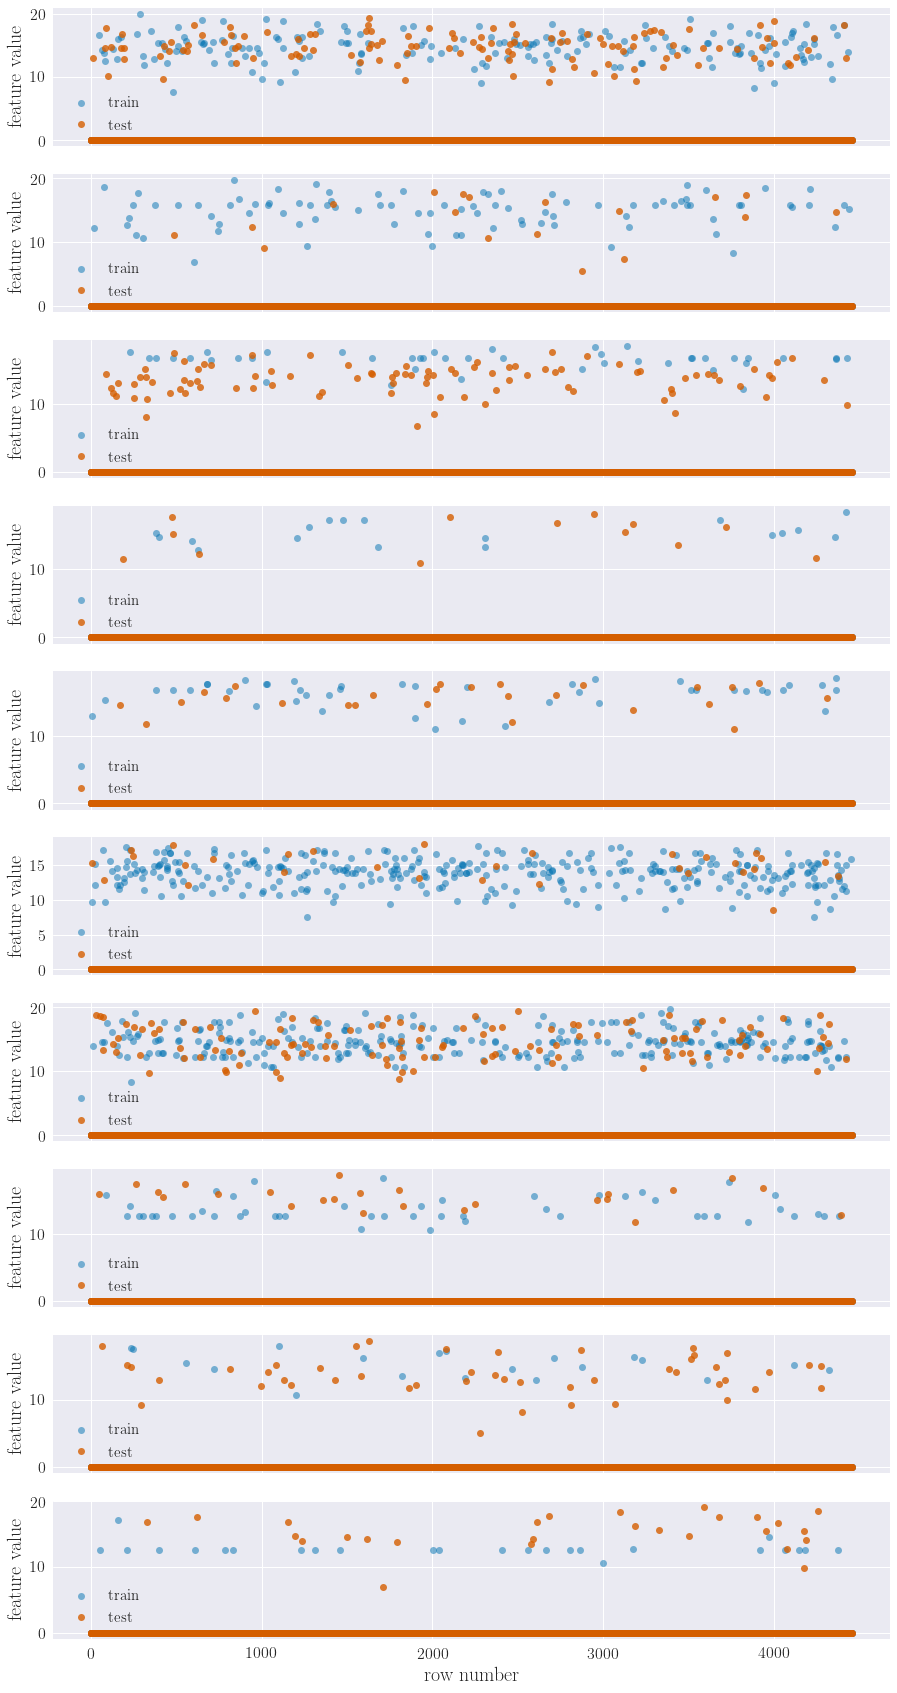

In [48]:
ncols = 10
idxcols = np.random.choice(np.arange(train_data.shape[1]),ncols)
_, axes = plt.subplots(ncols, figsize=(15,3*ncols), sharex=True)
for i, idx in enumerate(idxcols):
    axes[i].plot(np.log1p(train_data.iloc[:,idx]), 'o', alpha=0.5, label='train')
    axes[i].plot(np.random.choice(np.log1p(test_data.iloc[:,idx]), train_data.shape[0]), 'o', alpha=0.8, c=colours[2], label='test')
    axes[i].set_ylabel('feature value')
    axes[i].legend(fontsize=15)
plt.xlabel('row number')

At first sight no interesting patterns emerge.

In [11]:
train_target = pd.concat([train_data, target], axis=1)

In [69]:
correlations = pd.DataFrame({'feature': train_data.columns.values})

In [72]:
corrs = []
for col in train_data.columns.values:
    corrs.append(train_target[[col, 'target']].corr().iloc[0,1])

In [76]:
correlations['corr'] = np.abs(np.array(corrs))

In [78]:
sorted_corrs = correlations.sort_values(by='corr', ascending=False)

Text(0,0.5,'correlation w/target')

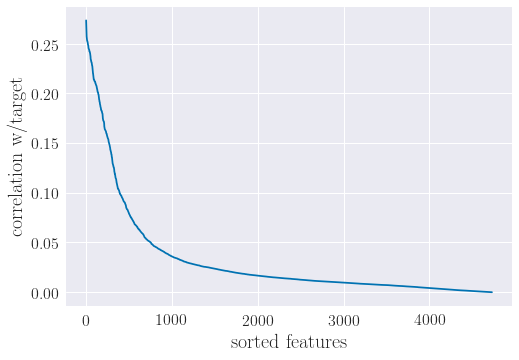

In [86]:
plt.plot(sorted_corrs['corr'].values)
plt.xlabel('sorted features')
plt.ylabel('correlation w/target')

Nothing remarkable here either. Let's have a closer look at the target itself.

In [12]:
target.describe()

count    4.459000e+03
mean     5.944923e+06
std      8.234312e+06
min      3.000000e+04
25%      6.000000e+05
50%      2.260000e+06
75%      8.000000e+06
max      4.000000e+07
Name: target, dtype: float64

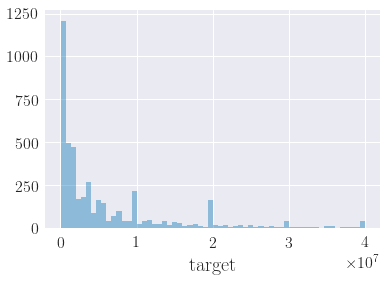

In [132]:
sns.distplot(target, kde=False, bins=60)

In [151]:
target.nunique()

1413

In [13]:
minvalue = target.min()
maxvalue = target.max()

Rows with minimum target

Text(0.5,0,'feature')

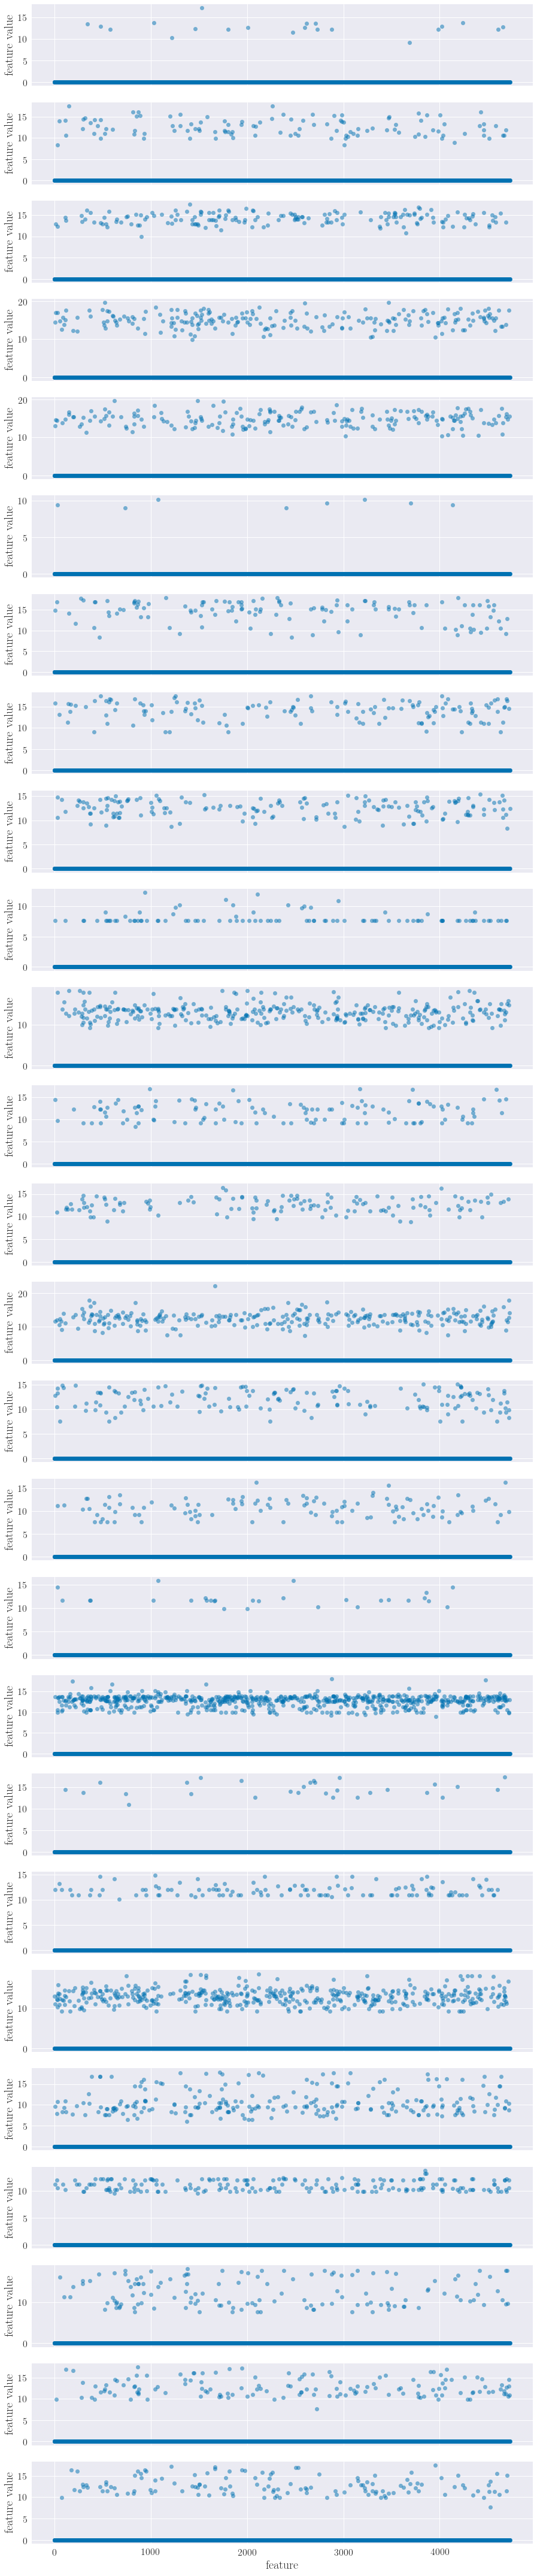

In [23]:
target_mins = train_target[train_target.target == minvalue]
nrows = target_mins.shape[0]
_, axes = plt.subplots(nrows, figsize=(15,3*nrows), sharex=True)
j = 0
for i, row in target_mins.iterrows():
    axes[j].plot(np.log1p(row.values[:-1]), 'o', alpha=0.5)
    axes[j].set_ylabel('feature value')
    j+=1
plt.xlabel('feature')

Rows with maximum target

Text(0.5,0,'feature')

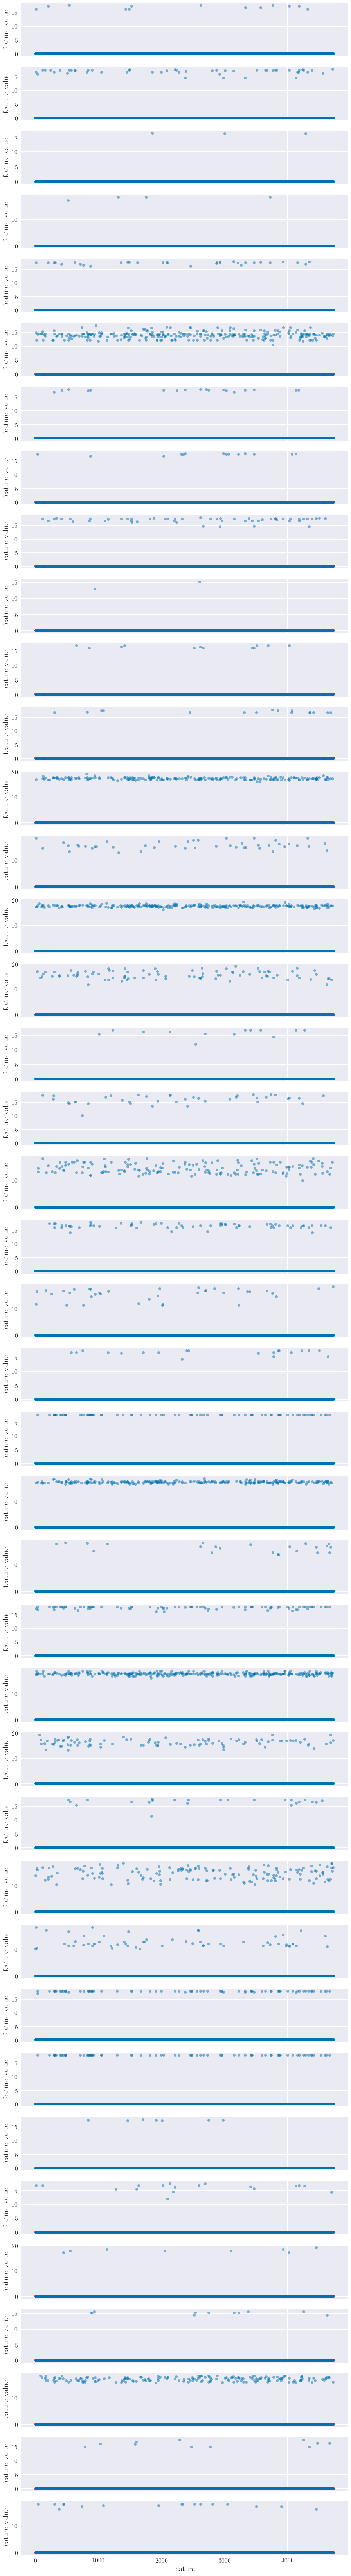

In [27]:
target_maxs = train_target[train_target.target == maxvalue]
nrows = target_maxs.shape[0]
_, axes = plt.subplots(nrows, figsize=(15,3*nrows), sharex=True)
j = 0
for i, row in target_maxs.iterrows():
    axes[j].plot(np.log1p(row.values[:-1]), 'o', alpha=0.5)
    axes[j].set_ylabel('feature value')
    j+=1
plt.xlabel('feature')

What about all stacked together?

Minimum

Text(0,0.5,'feature value')

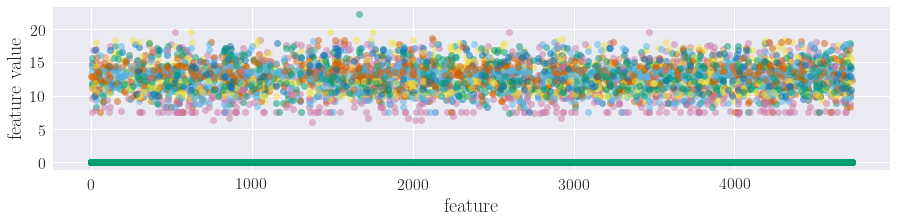

In [34]:
_, _ = plt.subplots(figsize=(15,3))
for i, row in target_mins.iterrows():
    plt.plot(np.log1p(row.values[:-1]), 'o', alpha=0.5)
plt.xlabel('feature')
plt.ylabel('feature value')

Maximum

Text(0,0.5,'feature value')

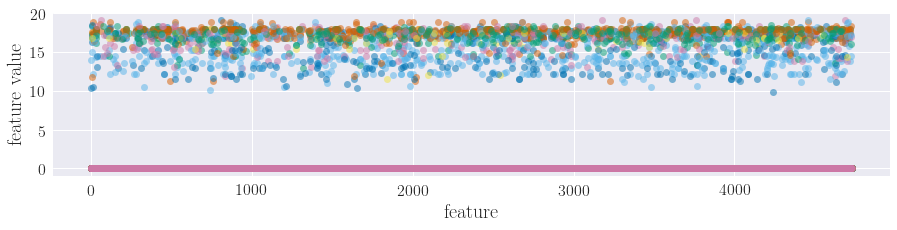

In [35]:
_, _ = plt.subplots(figsize=(15,3))
for i, row in target_maxs.iterrows():
    plt.plot(np.log1p(row.values[:-1]), 'o', alpha=0.5)
plt.xlabel('feature')
plt.ylabel('feature value')

What if we sort the data by target?

Is there any feature that increases/decreases monotonically?

In [50]:
sorted_train = train_target.sort_values(by='target')

Text(0,0.5,'target')

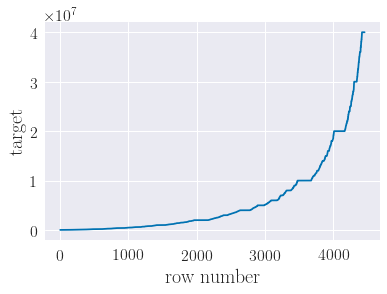

In [61]:
plt.plot(sorted_train.target.values)
plt.xlabel('row number')
plt.ylabel('target')

In [65]:
monotonic = []
for idx, col in enumerate(sorted_train.columns.values[:-1]):
    first_nonzero = False
    current = 0.
    mono = 'none'
    passed = True
    for i in range(len(sorted_train[col].values)):
        if first_nonzero:
            if sorted_train[col].values[i]>current:
                if mono == 'desc':
                    passed = False
                    break
                elif mono == 'none':
                    mono = 'asc'
                    current = sorted_train[col].values[i]
                else:
                    current = sorted_train[col].values[i]
            if sorted_train[col].values[i]>0. and sorted_train[col].values[i]<current:
                if mono == 'asc':
                    passed = False
                    break
                elif mono == 'none':
                    mono = 'desc'
                    current = sorted_train[col].values[i]
                else:
                    current = sorted_train[col].values[i]
        elif sorted_train[col].values[i]>0.:
            first_nonzero = True
            current = sorted_train[col].values[i]
    if passed:
        monotonic.append(col)

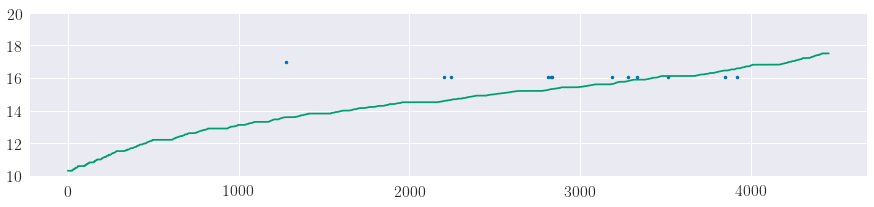

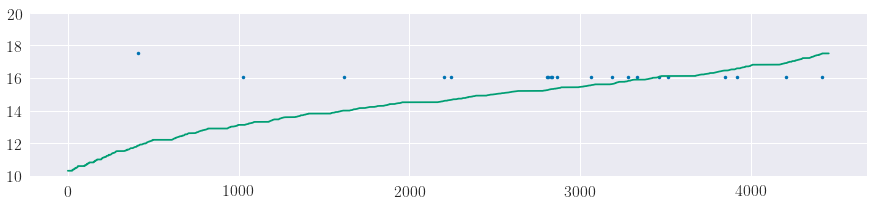

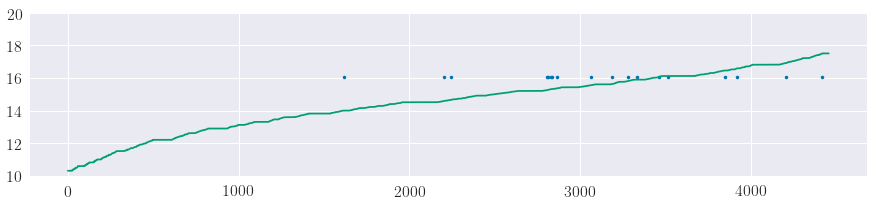

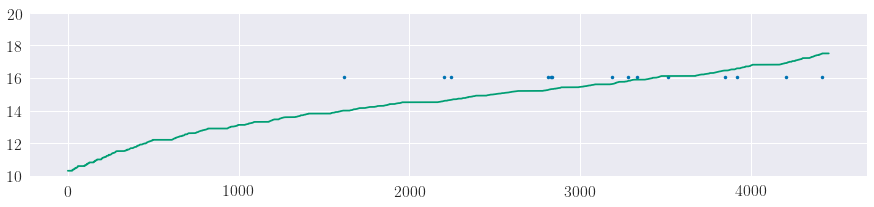

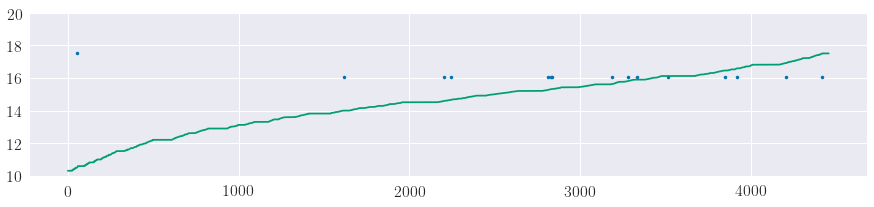

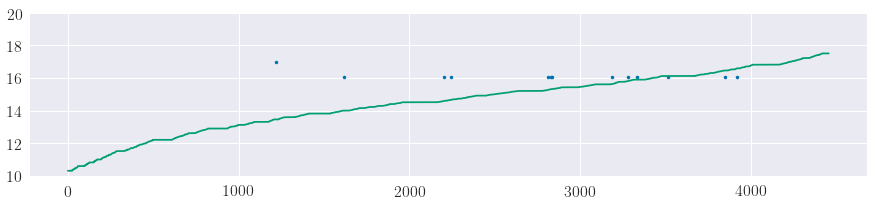

In [87]:
for col in monotonic:
    if len(sorted_train[col].nonzero()[0])>10:
        _, _ = plt.subplots(figsize=(15,3))
        plt.plot(np.log1p(sorted_train[col].values), '.')
        plt.plot(np.log1p(sorted_train.target.values))
        plt.ylim(10,20)

Not really.

Are there any rows of zeros in the dataset?

No.

In [45]:
train_data.mean(axis=1).values.min()

0.8456659619450317

Let's explore the statistical properties

In [88]:
train_stat = stats_prop(train_data)

In [90]:
train_stat_target = pd.concat([train_stat, target], axis=1)

In [92]:
correlations = pd.DataFrame({'feature': train_stat.columns.values})
corrs = []
for col in train_stat.columns.values:
    corrs.append(train_stat_target[[col, 'target']].corr().iloc[0,1])
correlations['corr'] = np.abs(np.array(corrs))

In [93]:
sorted_corrs = correlations.sort_values(by='corr', ascending=False)

Text(0,0.5,'correlation w/target')

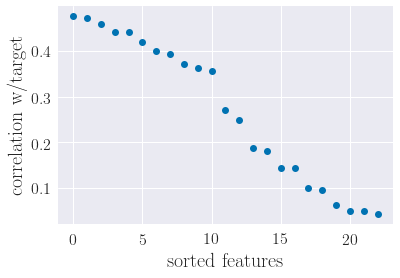

In [95]:
plt.plot(sorted_corrs['corr'].values, 'o')
plt.xlabel('sorted features')
plt.ylabel('correlation w/target')

This looks better than the raw features. Which are the statistical properties most correlated with the target?

In [97]:
sorted_corrs[sorted_corrs['corr']>0.4]

,feature,corr
13,log_means,0.475971
14,log_gmeans,0.471802
15,log_medians,0.457945
22,log_q3s,0.442445
21,log_q1s,0.442445
1,gmeans,0.420386


Many logarithmic features. What is the correlation with log(target)?

In [98]:
train_stat_log_target = pd.concat([train_stat, np.log1p(target)], axis=1)

In [99]:
correlations = pd.DataFrame({'feature': train_stat.columns.values})
corrs = []
for col in train_stat.columns.values:
    corrs.append(train_stat_log_target[[col, 'target']].corr().iloc[0,1])
correlations['corr'] = np.abs(np.array(corrs))

In [100]:
sorted_corrs = correlations.sort_values(by='corr', ascending=False)

Text(0,0.5,'correlation w/target')

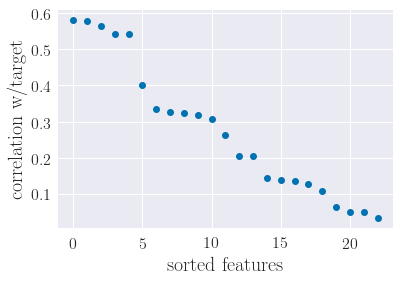

In [101]:
plt.plot(sorted_corrs['corr'].values, 'o')
plt.xlabel('sorted features')
plt.ylabel('correlation w/target')

In [104]:
sorted_corrs[sorted_corrs['corr']>0.4]

,feature,corr
13,log_means,0.579674
14,log_gmeans,0.576530
15,log_medians,0.564506
22,log_q3s,0.542910
21,log_q1s,0.542910


Let's look at the df sorted by target

In [105]:
sorted_train_stat = stats_prop(sorted_train.drop(['target'], axis=1))

In [111]:
sorted_train_stat_target = sorted_train_stat.copy()

In [112]:
sorted_train_stat_target['target'] = sorted_train.target.values

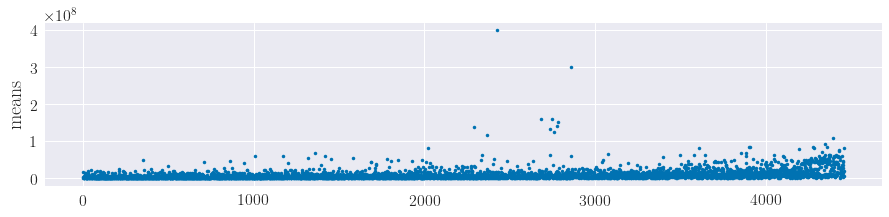

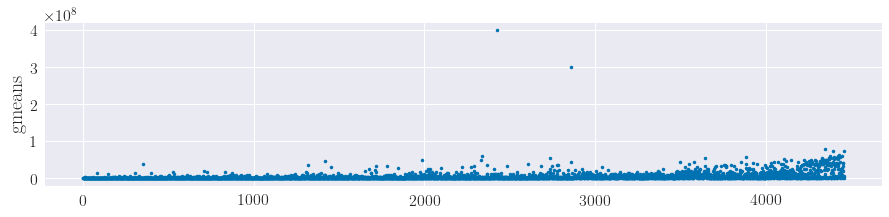

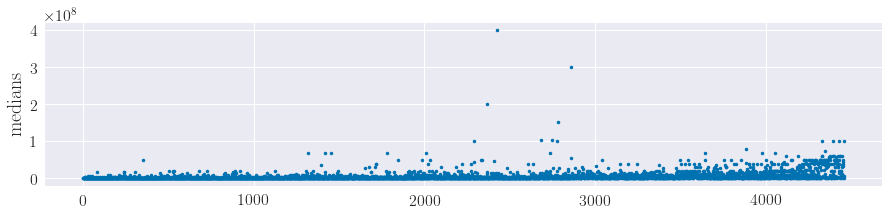

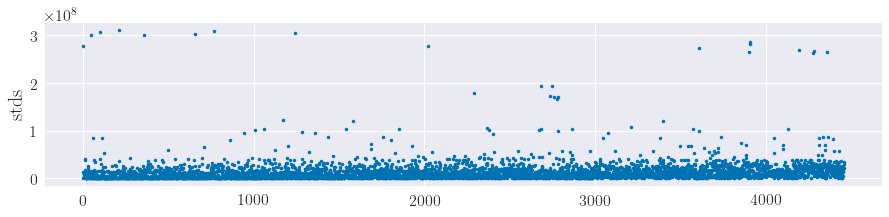

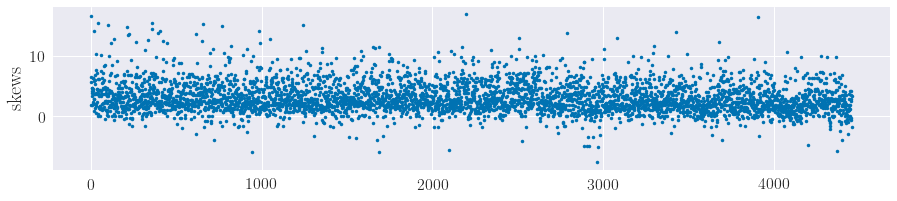

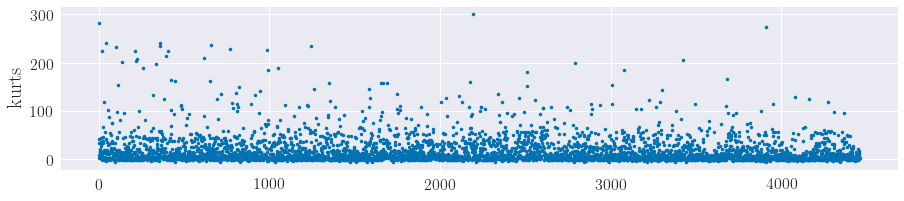

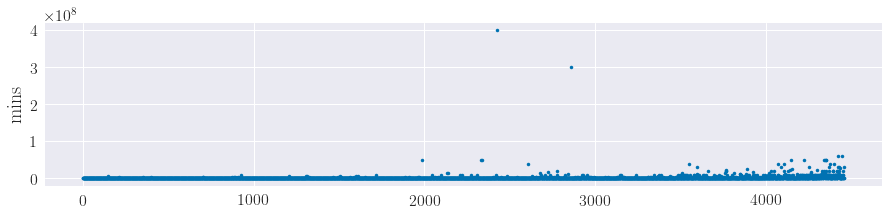

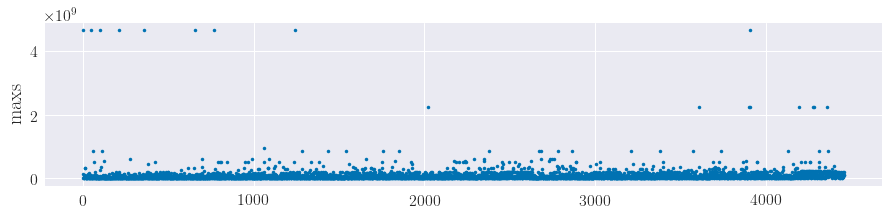

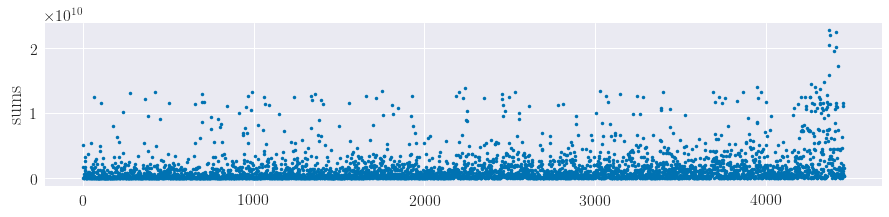

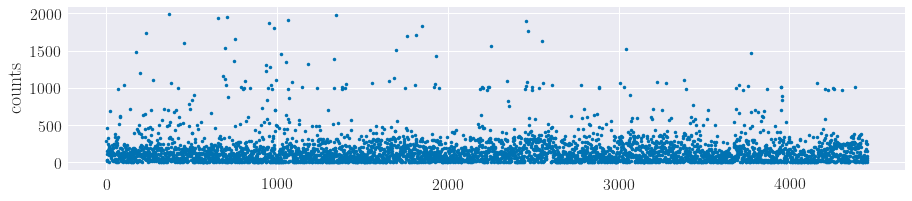

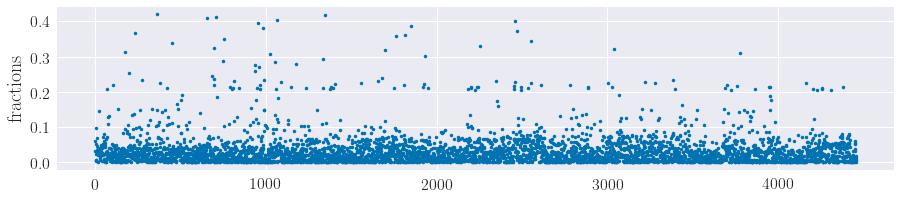

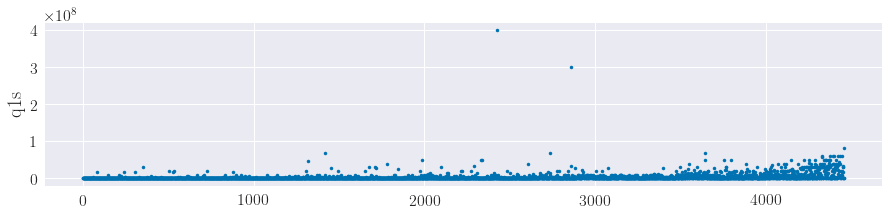

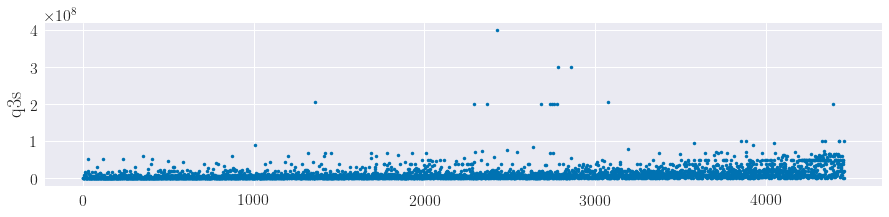

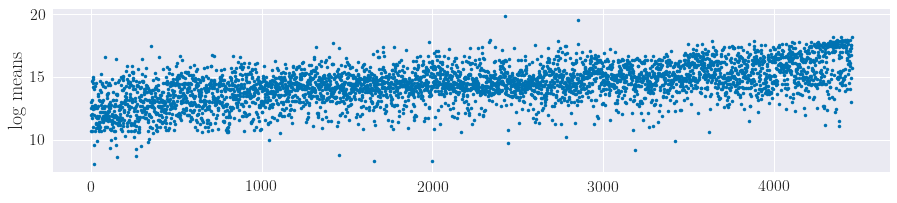

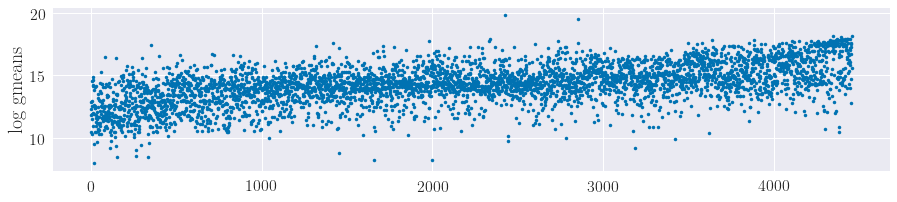

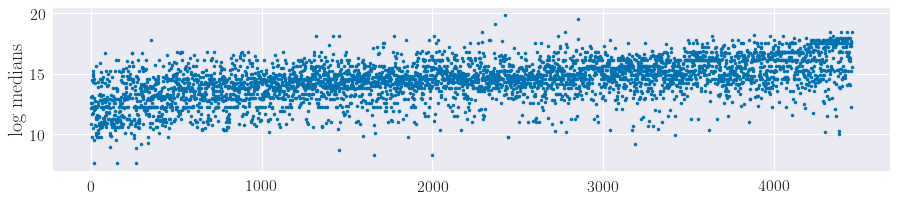

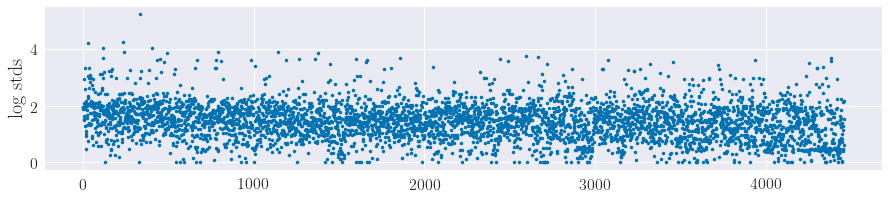

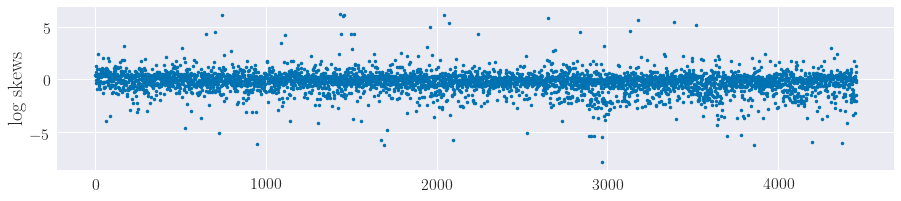

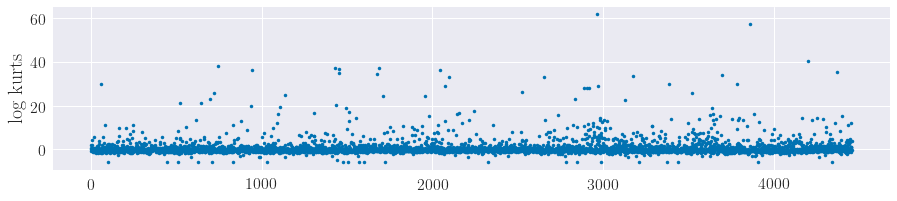

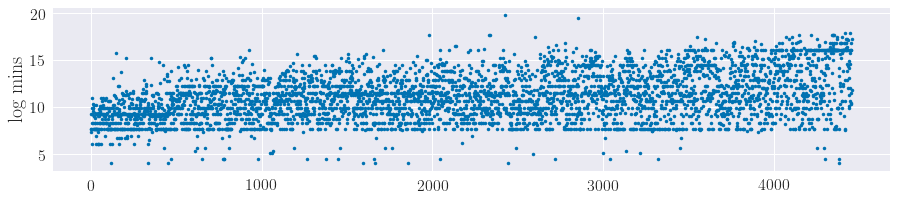

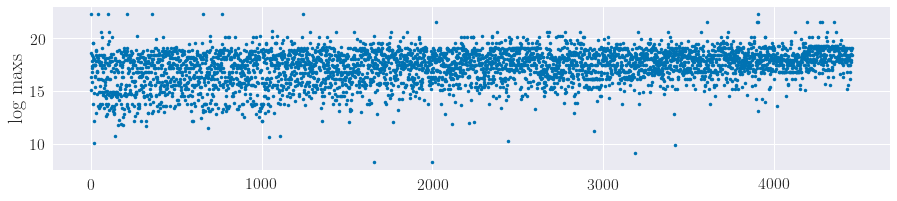

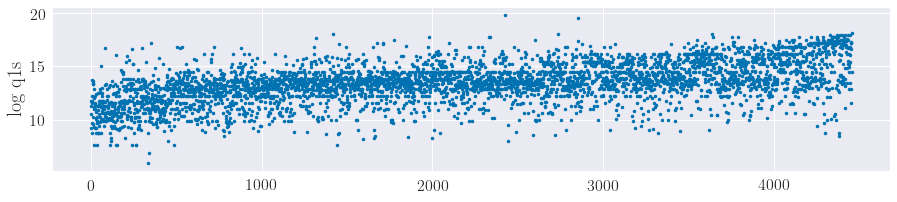

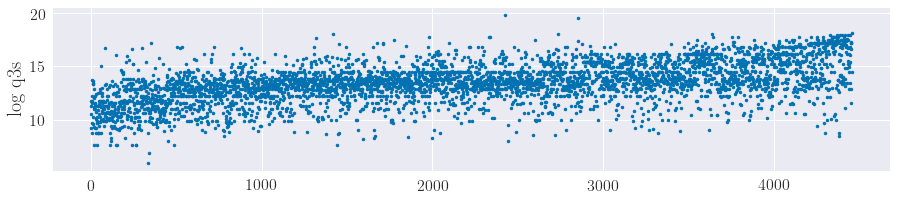

In [117]:
for col in sorted_train_stat.columns.values:
    _, _ = plt.subplots(figsize=(15,3))
    plt.plot(sorted_train_stat_target[col].values, '.')
    plt.ylabel(col.replace('_', ' '))
    #plt.plot(sorted_train_stat_target['target'].values)

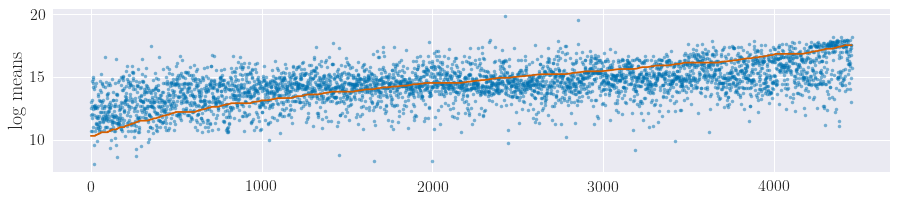

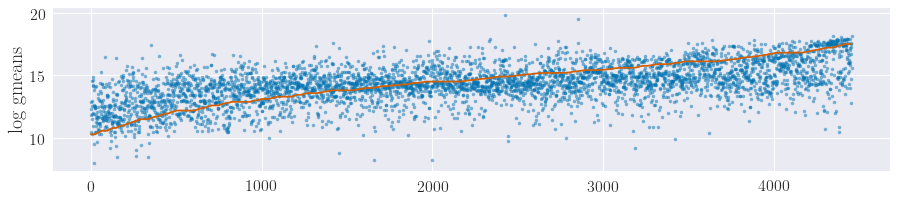

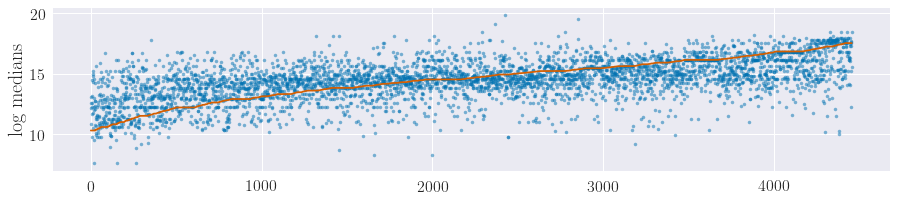

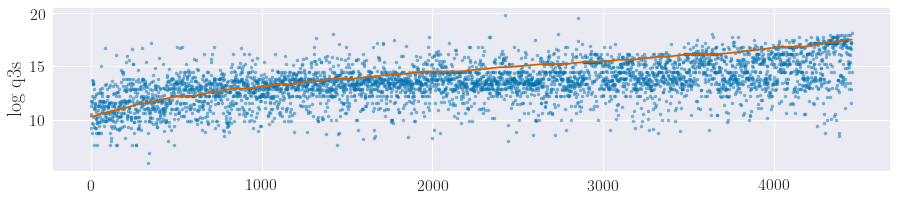

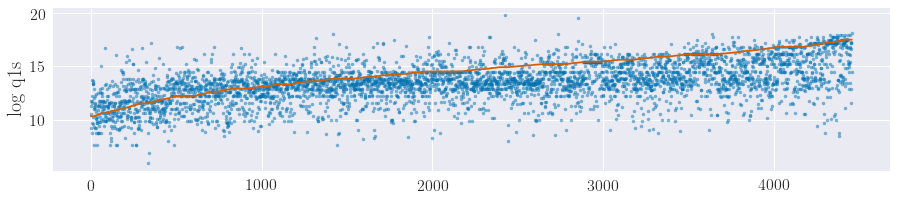

In [120]:
for col in sorted_corrs[sorted_corrs['corr']>0.4].feature.values:
    _, _ = plt.subplots(figsize=(15,3))
    plt.plot(sorted_train_stat_target[col].values, '.', alpha=0.5)
    plt.ylabel(col.replace('_', ' '))
    plt.plot(np.log1p(sorted_train_stat_target['target'].values), c=colours[2])

Looking better!

Finally, the other aggregated features.

In [359]:
train_difs = other_derived(train_data)
sorted_train_difs = other_derived(sorted_train.drop(['target'], axis=1))

In [360]:
sorted_train_difs_target = sorted_train_difs.copy()

sorted_train_difs_target['target'] = sorted_train.target.values

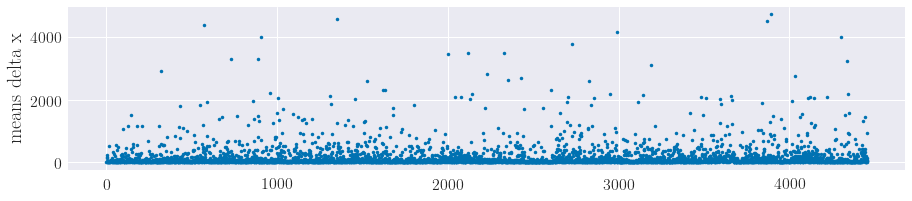

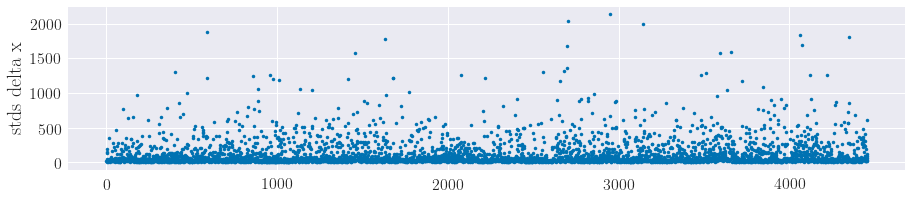

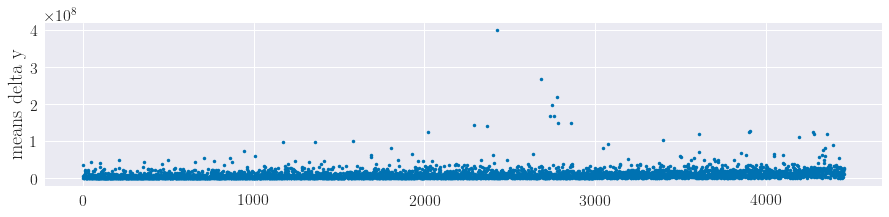

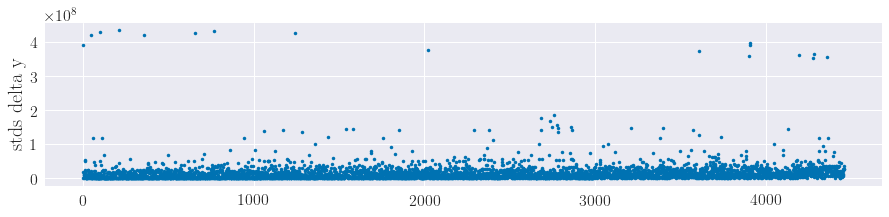

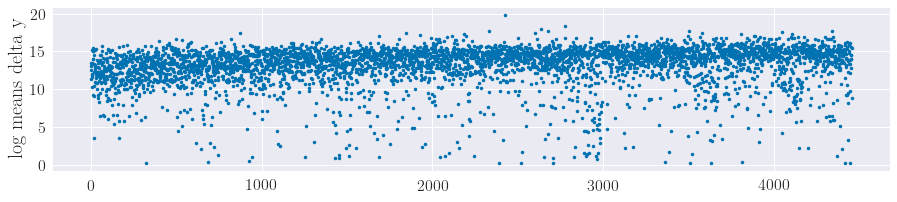

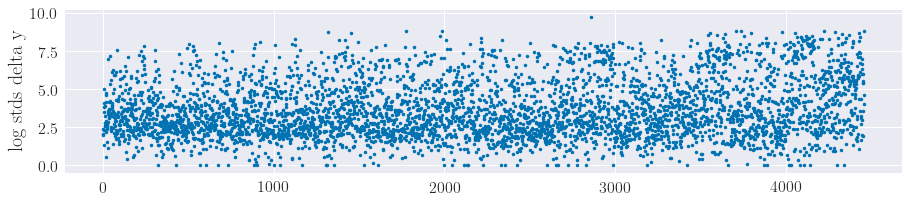

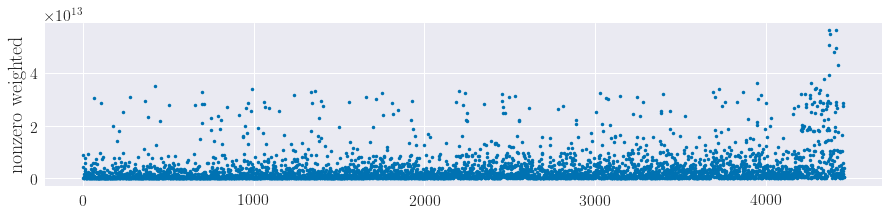

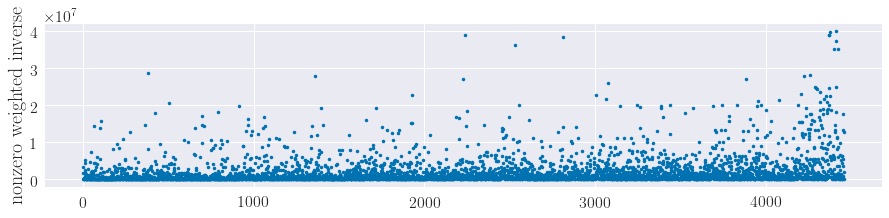

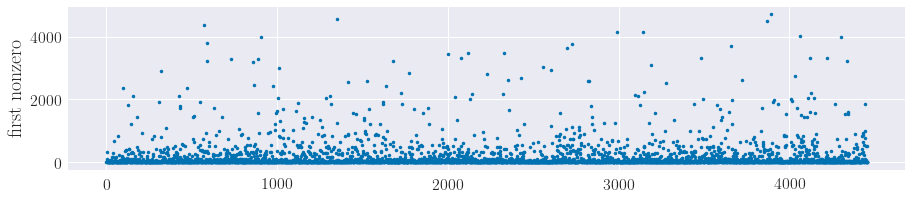

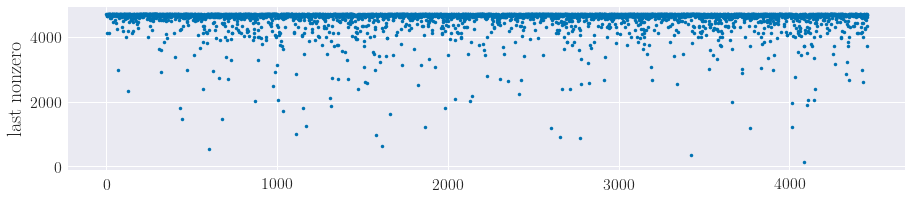

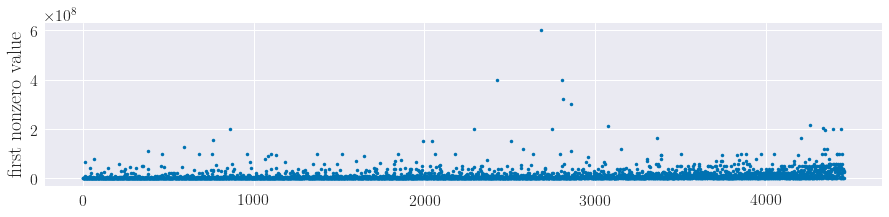

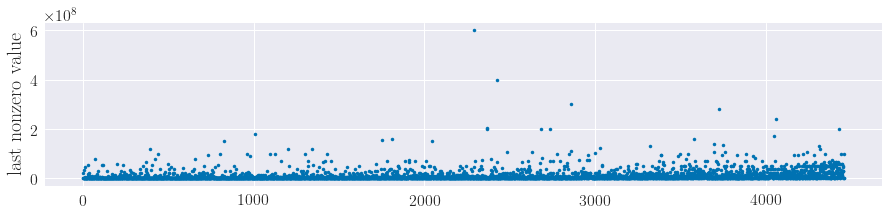

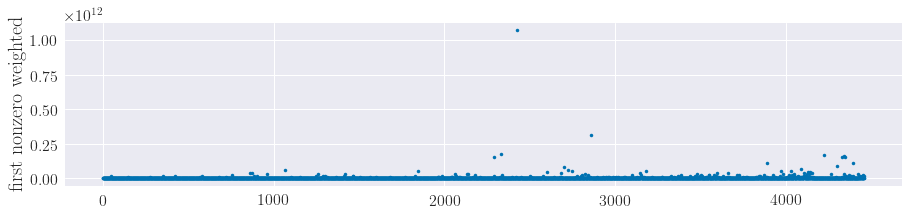

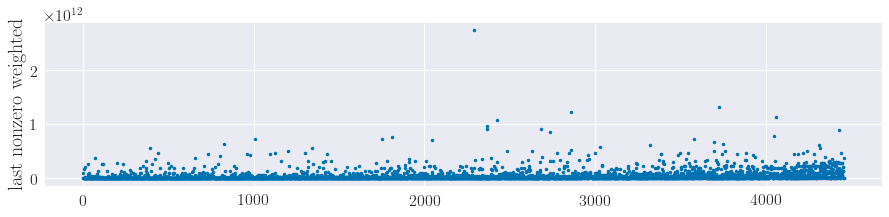

In [361]:
for col in sorted_train_difs.columns.values:
    _, _ = plt.subplots(figsize=(15,3))
    plt.plot(sorted_train_difs_target[col].values, '.')
    plt.ylabel(col.replace('_', ' '))
    #plt.plot(sorted_train_stat_target['target'].values)

In [368]:
train_difs_log_target = pd.concat([train_difs, np.log1p(target)], axis=1)

correlations = pd.DataFrame({'feature': train_difs.columns.values})
corrs = []
for col in train_difs.columns.values:
    corrs.append(train_difs_log_target[[col, 'target']].corr().iloc[0,1])
correlations['corr'] = np.abs(np.array(corrs))

Text(0,0.5,'correlation w/target')

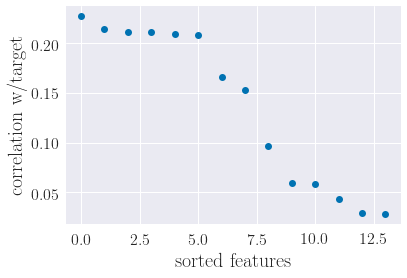

In [369]:
sorted_corrs = correlations.sort_values(by='corr', ascending=False)

plt.plot(sorted_corrs['corr'].values, 'o')
plt.xlabel('sorted features')
plt.ylabel('correlation w/target')

In [370]:
sorted_corrs[sorted_corrs['corr']>0.1]

,feature,corr
2,means delta y,0.227301
7,nonzero weighted inverse,0.214367
13,last nonzero weighted,0.211656
10,first nonzero value,0.211375
6,nonzero weighted,0.209259
11,last nonzero value,0.208714
5,log stds delta y,0.166419
4,log means delta y,0.153082


So, there seems to be no information across the feature axis. The indices of the columns with non-zero values and their differences appear not to be relevant.

Any other engineered feature to think about? Nothing magical so far.